<a href="https://colab.research.google.com/github/jamogh/Stock_Prediction/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib tensorflow scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [6]:
path = "/content/drive/MyDrive/BTC-USD.csv"
df  = pd.read_csv(path)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-03,22981.302734,23578.650391,22747.835938,22846.507813,22846.507813,26288169966
1,2022-08-04,22848.214844,23198.009766,22485.701172,22630.957031,22630.957031,25120229769
2,2022-08-05,22626.833984,23422.828125,22612.177734,23289.314453,23289.314453,28881249043
3,2022-08-06,23291.423828,23326.562500,22961.279297,22961.279297,22961.279297,15978259885
4,2022-08-07,22963.505859,23359.009766,22894.556641,23175.890625,23175.890625,15886817043


In [8]:
# Filter only the relevant columns
df = df[['Date', 'Close']]
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)
# Scale the data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)


<ipython-input-8-ff24f508167d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train_data, test_data = df.iloc[0:train_size,:], df.iloc[train_size:len(df),:]


In [10]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 30
X_train, y_train = create_dataset(train_data, train_data.Close, time_steps)
X_test, y_test = create_dataset(test_data, test_data.Close, time_steps)


In [11]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, shuffle=False)


Epoch 1/100
8/8 [==============================] - 7s 169ms/step - loss: 0.0494 - val_loss: 0.0027
Epoch 2/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0309 - val_loss: 0.0129
Epoch 3/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0280 - val_loss: 0.0456
Epoch 4/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0144 - val_loss: 0.0040
Epoch 5/100
8/8 [==============================] - 0s 37ms/step - loss: 0.0101 - val_loss: 0.0141
Epoch 6/100
8/8 [==============================] - 0s 49ms/step - loss: 0.0117 - val_loss: 0.0023
Epoch 7/100
8/8 [==============================] - 1s 67ms/step - loss: 0.0099 - val_loss: 0.0023
Epoch 8/100
8/8 [==============================] - 1s 64ms/step - loss: 0.0082 - val_loss: 0.0054
Epoch 9/100
8/8 [==============================] - 0s 61ms/step - loss: 0.0085 - val_loss: 0.0039
Epoch 10/100
8/8 [==============================] - 1s 67ms/step - loss: 0.0085 - val_loss: 0.0029
Epoch 11/100
8/8 [

2/2 [==============================] - 2s 15ms/step
RMSE: 583.9797354801238


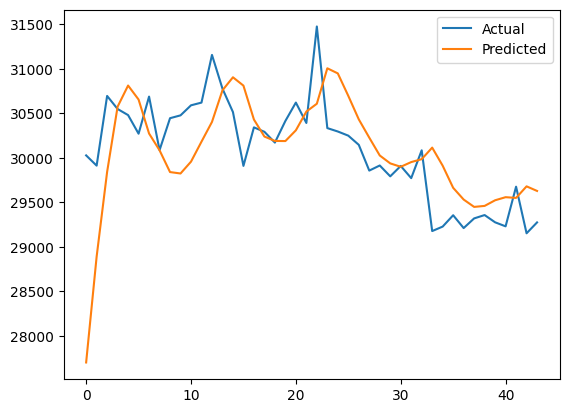

In [13]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred - y_test) ** 2)))
print('RMSE:', rmse)

# Plot the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
